# Logistic Regression from scratch

Our second model is logistic regression. In this first example we will perform a binary classification

We will train the algorithm in the [titanic](https://www.kaggle.com/c/titanic) dataset from kaggle.

I have already done an EDA and feature engineering so we have a ready to use dataset. More information here

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load data
df = pd.read_csv('train_file.csv')

In [3]:
y = df['Survived']
df.drop('Survived',inplace = True,axis = 1)

In [4]:
X = np.array(df)
y = np.array(y)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 0)

# Now it's time to create the models

First, notation and equations that we are going to use in the code



**Notation:**

$\alpha = \text{Learning rate}$


$\nabla_{\theta} = \text{Gradient}$

$m = \text{Length of the training set}$

$\theta = \text{Theta parameters}$


-----------------------------

**Equations:**


**Sigmoid function**

$\sigma (p) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-p}}  $ 

**Model prediction** 

$p = \sigma(\theta \cdot X)$




$y =
\begin{cases}
  0 =\text {if  p} \lt 0.5\\
  1 =\text {if  p} \geq 0.5
\end{cases}
$



**Cost Function**

$\text {Binary cross entropy loss} = -\frac{1}{m} \sum_{i=1}^m[y log(p)+(1-y)log(1-p)]$

**Gradient**

$\nabla_{\theta} \to \frac{\partial}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m ({p - y})x$

**Vectorized Gradient**

$\nabla_{\theta}$  $ = \frac{1}{m} \cdot X^T (p- y)$

**Update theta**

$\theta = \theta - \alpha \cdot \nabla_{\theta}$


# Custom Model

In [8]:
"""
    Logistic regression class will take two initial arguments:
        * Iterations
        * learning_rate


        * The fit method will train the model
        * The predict method will compute the parameters in the test data
"""


class logistic_regression:
    def __init__(self,iterations,learning_rate):
        self.iterations = iterations
        self.learning_rate = learning_rate
    
    #Sigmoid function
    def sigmoid(self,x):
        z = 1/(1 + np.exp(-x))
        return z

    def fit(self,X,y):

        m,n = X.shape
        theta = np.random.randn(n) # Random Initialization of theta

        #add bias terms to X and theta
        X_with_bias = np.c_[np.ones(m),X] 
        theta_with_bias = np.insert(theta,0,0)
        
        cost = []
        for i in range(self.iterations):
            h = np.dot(X_with_bias,theta_with_bias)
            z = self.sigmoid(h)    
            J = (-1/m)*np.sum(y*np.log(z)+(1-y)*np.log(1-z))

            error = z - y
            grad = (1/m)*np.dot(X_with_bias.T,error)
            theta_with_bias =  theta_with_bias - grad*self.learning_rate
            cost.append(J)
            
        plt.plot(cost)
        plt.xlabel('Iterations')
        plt.ylabel('Binary cross entropy loss')
        plt.show()
        return theta_with_bias
    
    def predict(self,X_test,theta):
        m_test = X_test.shape[0]

        #Adding X0 = 1 to test set
        X_test_bias = np.c_[np.ones(m_test),X_test]

        #Calculate the prediction
        pred = self.sigmoid(np.dot(X_test_bias,theta))
        return (pred >= 0.5 )*1

In [9]:
##Function for training data 
custom_model = logistic_regression(iterations = 2500,learning_rate = 0.05)

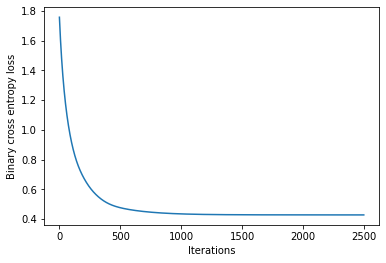

In [10]:
theta = custom_model.fit(X_train,y_train)

Looks fine the convergence

# Scikit-learn Model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
scikit_model = LogisticRegression()
scikit_model.fit(X_train,y_train)

LogisticRegression()

## Evaluate and compare performance. 

We will use accuracy as metric

Logistic regression in scikit-learn will accept regularization by default (C = 1) Our model does not have regularization(yet). So keep that in mind

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
#Compute prediction in each model
pred_sklearn = scikit_model.predict(X_test)
pred_custom = custom_model.predict(X_test,theta)

#Compute the error from each model
accuracy_sklearn = accuracy_score(y_test,pred_sklearn)
accuracy_custom = accuracy_score(y_test,pred_custom)

print('Accuracy in test set from scikit-learn model:',accuracy_sklearn)
print('Accuracy in test from our custom model:',accuracy_custom)

Accuracy in test set from scikit-learn model: 0.8116591928251121
Accuracy in test from our custom model: 0.8116591928251121


The accuracy is very similar!

We accomplish a good model on test set. 

We will evaluate the models, but in the real test data. Which is basically the one that kaggle ask us to predict in the competition. We are going to make predictions using both models and upload both results to see which model wins



The data is already prepared as the training set

In [15]:
test_data = pd.read_csv('test_final.csv')
passenger_id = test_data['PassengerId']
test_data.drop('PassengerId',axis = 1,inplace= True)

In [16]:
test_arr = np.array(test_data)

In [17]:
final_pred_custom = custom_model.predict(test_arr,theta)
final_pred_scikit = scikit_model.predict(test_data)

We have the predictions in an array. We need to do some preprocess before uploading data

In [18]:
def upload_data(pred,name):
    final_pred = pd.Series(pred)
    df = pd.DataFrame(data = passenger_id)
    df['Survived'] = final_pred_custom
    return df.to_csv(name,index=False)


In [19]:
upload_data(final_pred_scikit,'scikit_pred.csv')
upload_data(final_pred_scikit,'custom_pred.csv')

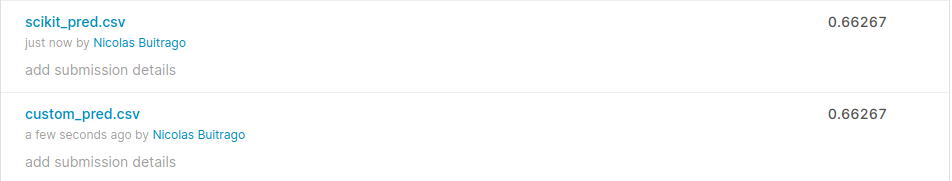

They got the same score! They work similar! 

Even though this is not a good score. But for more on titanic competition you can check my other notebook. I scored 0.77272 using random forest